# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="../UnityTennis/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.09000000171363354


In [6]:
def train_CollabAndCompete(env, brain_name, n_episodes, max_t, \
                           solved_score, consec_episodes, print_every, \
                           maac_agent, agent_1_path , agent_2_path):
    """
    Params
    ======
        env                   : the environment to be used
        brain_name            : the name of the brain to be used
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        solved_score (float)  : min avg score over consecutive episodes
        consec_episodes (int) : number of consecutive episodes used to calculate score
        print_every (int)     : interval to display results
        maac_agent (MAAC)     : the MAAC agent which contains agent_1 and agent_2
        agent_1_path (str)    : directory to store the agent_1 weights
        agent_1_path (str)    : directory to store the agent_2 weights

    """

    # reset the environment
    env_info = env.reset(train_mode=True)[brain_name]
    brain = env.brains[brain_name]

    # number of agents
    num_agents = len(env_info.agents)
    print('Number of agents:', num_agents)

    # size of each action
    action_size = brain.vector_action_space_size
    print('Size of each action:', action_size)

    # examine the state space
    states = env_info.vector_observations
    state_size = states.shape[1]
    print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
    print('The state for the first agent looks like:', states[0])

    total_rewards = []
    avg_scores = []
    max_avg_score = -1
    mean_scores = []                               # list of mean scores from each episode
    min_scores = []                                # list of lowest scores from each episode
    max_scores = []                                # list of highest scores from each episode
    best_score = -np.inf
    scores_window = deque(maxlen=consec_episodes)  # mean scores from most recent episodes
    moving_avgs = []                               # list of moving averages
    df = pd.DataFrame(columns=['episode', 'duration', 'min', 'max', 'std', 'mean'])
    latest_avg_score = -1
    
    threshold_exceedings = 0

    # for early-stopping training if consistently worsen for 30 episodes
    worsen_tolerance = 20


    # now execute up to maximum "maxEpisodes" episodes
    for i_episode in range(1, n_episodes+1):
        # 1.Step: reset the environment - set the train_mode to True !!
        env_info = env.reset(train_mode=True)[brain_name]  

        # 2. Step: get the current state for each agent
        states = env_info.vector_observations     
        #print("States = " , states)


        # 3.Step: set the score of the current episode to 0 for each agent
        scores = np.zeros(num_agents)                          

        # 3a. Step: Reset all agents
        agent.reset()
        
        start_time = time.time()
        noise_t = 1.0
        noise_decay = 0.995

        # 4.Step: while episode has not ended (done = True or t < max_t) repeat
        for t in range(max_t):
            # 5.Step: Calculate the next action from agent with noise
            actions = agent.act(states, noise_t)  

            # 6.Step: Tell the environment about this action and get result
            env_info = env.step(actions)[brain_name]            

            # 7.Step: now let's get the state observation from observation            
            next_states = env_info.vector_observations          

            # 8.Step: now let's get the reward observation from observation            
            rewards = env_info.rewards    

            # 9.Step: now let's get the done observation from observation
            dones = env_info.local_done                         

            # 10.Step: Add the reward of the last action-state result  
            #scores += rewards
            scores += rewards
            
            noise_t *= noise_decay
 
            # 11.Step: Execute a training step of the agent
            agent.step(states, actions, rewards, next_states, dones, t)

            # 12.Step: Continue while-loop with next_state as current state            
            states = next_states

            # 13.Step: in case of end of episode print the result and break loop 
            if np.any(dones):                                   # exit loop when episode ends
                break

        duration = time.time() - start_time
        min_scores.append(np.min(scores))             # save lowest score for a single agent
        max_scores.append(np.max(scores))             # save highest score for a single agent
        mean_scores.append(np.mean(scores))           # save mean score for the episode
        scores_window.append(mean_scores[-1])         # save mean score to window
        moving_avgs.append(np.mean(scores_window))    # save moving average
        episode_score = np.max(scores)
        total_rewards.append(episode_score)

        df.loc[i_episode-1] = [i_episode] + list([duration, np.min(scores),
                                                  np.max(scores),
                                                  np.std(scores),
                                                  np.mean(scores)])

            
        # 16.Step: Print results every print_every episodes 
        if i_episode % print_every == 0:
            print("\rEpisodic {} Score: {:.4f}\t Avg Score: {:.4f}".format( \
                i_episode, episode_score, latest_avg_score), end=' ')

            if episode_score > best_score:
                best_score = episode_score
                # save best model so far
                agent.save(agent_1_path , agent_2_path)


        if episode_score > solved_score
            threshold_exceedings += 1
            
            if threshold_exceedings > 10:
                break
        else:
            threshold_exceedings = 0
                
                
        # 17.Step: save actor and critic in case a new best score has been encountered 
       # record avg score for the latest 100 steps
        if len(total_rewards) >= 100:
            latest_avg_score = sum(total_rewards[(len(total_rewards)-100):]) / 100
            avg_scores.append(latest_avg_score)

            if max_avg_score <= latest_avg_score:           # record better results
                worsen_tolerance = 20           # re-count tolerance
                max_avg_score = latest_avg_score
            else:
                if max_avg_score > 2.0:
                    worsen_tolerance -= 1                   # count worsening counts
                    print("Loaded from last best model.")
                    # continue from last best-model
                    agent.reload(agent_1_path,0)
                    agent.reload(agent_2_path,1)
                if worsen_tolerance <= 0:                   # early stop training
                    print("Early Stop Training.")
                    break
    return df

In [7]:
def test_CollabAndCompete(env, brain_name, agent,  runs=100):
    # set overall sum of scores to 0
    mean_scores = []

    # now execute up to maximum runs episodes
    for i_episode in range(runs):

        # 1.Step: reset the environment - set the train_mode to False !!
        env_info = env.reset(train_mode=True)[brain_name]     

        # 2. Step: get the current state 
        states = env_info.vector_observations                  
        
        # 3.Step: set the score of the current episode to 0
        num_agents = len(env_info.agents)
        scores = np.zeros(num_agents)                          
        
        start_time = time.time()
        
        # 4.Step: while episode has not ended (done = True) repeat
        while True:
            # 5.Step: Calculate the next action from agent with epsilon 0 
            #         add_noise = False because we are not in training mode !
            actions = agent.act(states, noise_t=0.0)         

            # 6.Step: Tell the environment about this action and get result
            env_info = env.step(actions)[brain_name]           

            # 7.Step: now let's get the state observation from observation
            next_states = env_info.vector_observations         

            # 8.Step: now let's get the reward observation from observation
            rewards = env_info.rewards                        

            # 9.Step: now let's get the done observation from observation
            dones = env_info.local_done                         
            
            # 10.Step: Add the reward of the last action-state result  
            scores += env_info.rewards                         
            
            # 11.Step: Continue while-loop with next_state as current state
            states = next_states                                           

            # 12.Step: in case of end of episode print the result and break loop 
            if np.any(dones):                                 
                break

        # 13.Step: Finally append the score of last epsisode to the overall scores
        mean_scores.append(np.mean(scores))

        duration = time.time() - start_time
        print('\rEpisode {} ({} sec)\tMean: {:.1f}'.format(
            i_episode, round(duration), mean_scores[-1]))


    return mean_scores


In [19]:
def plot_minmax(df):
    """Print min max plot of DQN Agent analytics

    Params
    ======
        df :    Dataframe with scores
    """
    ax = df.plot(x='episode', y='mean')
    plt.fill_between(x='episode', y1='min', y2='max', color='lightgrey', data=df)
    x_coordinates = [0, 5000]
    y_coordinates = [0.5, 0.5]
    plt.plot(x_coordinates, y_coordinates, color='red')
    plt.show()

In [16]:
from maac import MAAC
from ddpg_agent import DDPGAgent
from td3_agent import TD3Agent

import time
from collections import deque
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
max_episodes = 5000
max_t = 100000
threshold = 1.0
conseq_episodes = 5
print_every = 1

In [30]:
agent_1 = DDPGAgent(state_size, action_size)
agent_2 = TD3Agent(state_size, action_size)

agent_1_path = 'results/ddgp_solo/01_best_model.checkpoint'
agent_2_path = 'results/temp/new_td3_model.checkpoint'

agent = MAAC(state_size, action_size, agent_1, agent_2, False, True)
agent.load(agent_1_path,0)


df = train_CollabAndCompete(env, brain_name, max_episodes, max_t, threshold, \
                                conseq_episodes, print_every, agent, agent_1_path, agent_2_path)

plot_minmax(df)

Loaded model for agent  0   from path  results/ddgp_solo/01_best_model.checkpoint
Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.10262632 -1.5
 -0.          0.          9.97826481  2.65683436 -0.          0.        ]
Episodic 1258 Score: 0.1000	 Avg Score: 0.0520                                       Success memory ready for use!
Episodic 2386 Score: 0.1000	 Avg Score: 1.4687 

KeyboardInterrupt: 

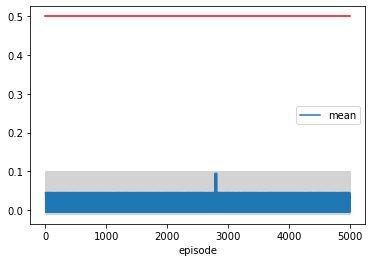

In [32]:
plot_minmax(df)

In [33]:
agent_1 = DDPGAgent(state_size, action_size)
agent_2 = TD3Agent(state_size, action_size)

agent_1_path = 'results/ddgp_solo/01_best_model.checkpoint'
agent_2_path = 'results/temp/new_td3_model.checkpoint'

agent = MAAC(state_size, action_size, agent_1, agent_2, False, False)

agent.load(agent_1_path,0)
agent.load(agent_2_path,1) 

scores = test_CollabAndCompete(env, brain_name, agent,  runs=100)
print('Total score (averaged over agents) for 100 episodes: {}'.format(np.mean(scores)))

Loaded model for agent  0   from path  results/ddgp_solo/01_best_model.checkpoint
Loaded model for agent  1   from path  results/temp/new_td3_model.checkpoint
Episode 0 (0 sec)	Mean: -0.0
Episode 1 (0 sec)	Mean: 0.0
Episode 2 (0 sec)	Mean: 0.0
Episode 3 (0 sec)	Mean: 0.0
Episode 4 (0 sec)	Mean: -0.0
Episode 5 (0 sec)	Mean: 0.0
Episode 6 (0 sec)	Mean: -0.0
Episode 7 (0 sec)	Mean: -0.0
Episode 8 (0 sec)	Mean: 0.0
Episode 9 (0 sec)	Mean: -0.0
Episode 10 (0 sec)	Mean: -0.0
Episode 11 (0 sec)	Mean: -0.0
Episode 12 (0 sec)	Mean: -0.0
Episode 13 (0 sec)	Mean: 0.0
Episode 14 (0 sec)	Mean: 0.1
Episode 15 (0 sec)	Mean: -0.0
Episode 16 (0 sec)	Mean: 0.0
Episode 17 (0 sec)	Mean: -0.0
Episode 18 (0 sec)	Mean: -0.0
Episode 19 (0 sec)	Mean: -0.0
Episode 20 (0 sec)	Mean: -0.0
Episode 21 (0 sec)	Mean: 0.1
Episode 22 (0 sec)	Mean: 0.0
Episode 23 (0 sec)	Mean: 0.0
Episode 24 (0 sec)	Mean: 0.0
Episode 25 (0 sec)	Mean: 0.0
Episode 26 (0 sec)	Mean: 0.0
Episode 27 (0 sec)	Mean: -0.0
Episode 28 (0 sec)	Mean: 

Now let's do some testing of the agents...

In [ ]:
agent_1 = TD3Agent(state_size, action_size)
agent_2 = DDPGAgent(state_size, action_size)

agent_1_path = 'results/td3_opponent/00_best_td3_model.checkpoint'
agent_2_path = 'results/ddgp_solo/00_best_model.checkpoint'

agent = MAAC(state_size, action_size, agent_1, agent_2, False, False)

agent.load(agent_1_path,0)
agent.load(agent_2_path,1) 

scores = test_CollabAndCompete(env, brain_name, agent,  runs=100)
print('Total score (averaged over agents) for 100 episodes: {}'.format(np.mean(scores)))

In [ ]:
agent_1 = TD3Agent(state_size, action_size)
agent_2 = DDPGAgent(state_size, action_size)

agent_1_path = 'results/td3_opponent/00_best_td3_model.checkpoint'
agent_2_path = 'results/ddgp_solo/01_best_model.checkpoint'

agent = MAAC(state_size, action_size, agent_1, agent_2, False, False)

agent.load(agent_1_path,0)
agent.load(agent_2_path,1) 

scores = test_CollabAndCompete(env, brain_name, agent,  runs=100)
print('Total score (averaged over agents) for 100 episodes: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()